## NLP02(노드15)
- txt전처리, 토근화 활용해서 단어사전만들기

### 노드15 멋진 단어사전 만들기

#### 15-01 들어가며
- LMS 환경에서 실습 진행(colab 런타임 문제 등)
- KoNLPy, 그중에서도 가장 성능이 준수한 MeCab클래스를 활용
- colab의 경우 MeCab 사용이 어려우나, 교육생 동기분이 해결책 찾으심
  - https://record3329.tistory.com/30

In [1]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


#### 15-02 데이터 다운로드 및 분석
- 내려받은 데이터는 한국어의 형태소 분석과 품사 태깅, 기계 번역 연구를 위해 공개된 데이터

In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


##### 전처리 전 시각화
- 문장당 길이가 1500이 넘는 특이한 값들이 존재
  - 문장에서 '길이'는 형태를 의미

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


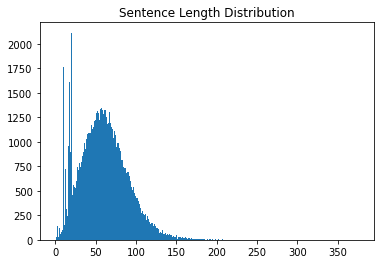

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
# 문장 길이가 1인 문장 ',' 임을 확인
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


##### 이상치 확인
- 중복제거가 안 된 것을 확인

In [6]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 길이가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [7]:
# 문장의 길이가 1500넘는 인덱스 11,19,21 중 11 확인
# 확인해보니 중복 처리가 안되었음
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

##### 중복제거 로직 적용
- python set 함수 통해 중복 제거

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


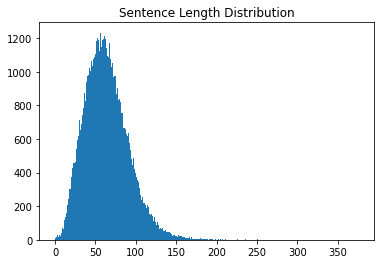

In [8]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

##### 데이터 선택
- 미니 배치를 만들 것을 생각하면 모든 데이터를 다 사용하는 것은 연산 측면에서 비효율적
- 미니 배치 특성상 각 데이터의 크기가 모두 동일해야 하기 때문에 가장 긴 데이터를 기준으로 Padding 처리 필요
  - 길이별로 정렬하여 미니 배치를 구성해 Padding을 최소화하는 방법 : 데이터 편향성 때문에 지양
- 여기서는 문장의 길이(형태소)를 10~150으로 제약

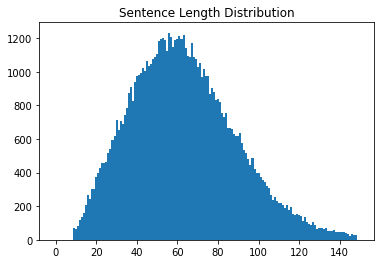

In [9]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장 선택
filtered_corpus = [s for s in cleaned_corpus if (len(s)<max_len) & (len(s) >= min_len)] 

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

#### 15-03 공백기반 토큰화

##### 함수 정의, 토큰화

In [10]:
# tokenize 함수 정의
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [11]:
# 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

for kor in filtered_corpus:
    # 코드를 작성하세요
    split_corpus.append(kor.split())

##### 단어 사전 길이 확인

In [12]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


##### 단어 사전 확인
- 공백기간 분리시, 1번의 '밝혔다'는 '밝히다', '밝다' 등과 유사한 의미임에도 별개로 취급됨(연산량 증가)
- 그렇다면 '밝' '혔다' 처럼 의미기반(형태소)로 분리할 수 있을까?

In [13]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ",", word)
          
    if idx > 10 : break  # idx가 10보다 크면 break!


0 , 이
1 , 밝혔다.
2 , 있다.
3 , 말했다.
4 , 수
5 , 있는
6 , 그는
7 , 대한
8 , 위해
9 , 전했다.
10 , 지난
11 , 이번


#### 15-04 형태소 기반 토큰화
- 이번 코스에서는 KoNLPy, 그중에서도 가장 성능이 준수한 MeCab클래스를 활용
- 단어 길이 차이 체크
  - 공백 기반 : 237,435
  - 형태소 기반 : 52,279

##### mecab.morphs() 쓰기

In [14]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    # 코드를 작성하세요
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    # 코드를 작성하세요
    mecab_corpus.append(mecab_split(kor))

In [15]:
# mecab_corpus 의 100번째 idx의 문장이 어떻게 형태소로 분리되었는지 체크
mecab_corpus[100]

['탈라바니',
 '대통령',
 '아들',
 '쿠바드',
 '탈라바니',
 '는',
 '아버지',
 '가',
 '심장',
 '마비',
 '나',
 '뇌졸중',
 '에',
 '걸렸',
 '다는',
 '것',
 '은',
 '완전히',
 '잘못',
 '된',
 '정보',
 '라고',
 '말',
 '했',
 '다',
 '.']

In [16]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


##### 디코딩-1
- 문장을 형태소 기반으로 쪼개는 것을 인코딩이라 지칭
- 형태소 기반으로 쪼갠 것(tokenize)을 문장으로 복원하는 것을 디코딩
- tokenizer.sequences_to_texts()

In [17]:
# Case 1 : tokenizer.sequences_to_texts()

# 여기에 코드를 작성하세요.
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

탈라바니 대통령 아들 쿠바드 탈라바니 는 아버지 가 심장 마비 나 뇌졸중 에 걸렸 다는 것 은 완전히 잘못 된 정보 라고 말 했 다 .


##### 디코딩-2
- tokenizer.index_word 사용

In [18]:
# Case 2 : tokenizer.index_word

# 여기에 코드를 작성하세요.
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

탈라바니 대통령 아들 쿠바드 탈라바니 는 아버지 가 심장 마비 나 뇌졸중 에 걸렸 다는 것 은 완전히 잘못 된 정보 라고 말 했 다 . 


##### 토근화 시사점-1
- 구글의 Word Piece 기반 한국어 언어모델이 엑소브레인의 Word Piece 기반 한국어 언어모델보다    
  전체적으로 성능이 크게 떨어지는 것은 시사점?
  - 언어모델(BERT) 훈련 시킨 원리 동등하고, 토크나이저 구성 원리도 Word Piece로 대등하더라도   
    학습에 사용된 말뭉치(corpus)의 품질과 분량, 토크나이저의 학습 대상 언어의 특화 정도, vocab의   
    최적화 전략의 차이가 있을 수 있음

##### 토근화 시사점-2
- 엑소브레인의 BERT에 두 가지 버전이 있는데, 이 중 한국어 전용 형태소분석기 토크나이저를 사용한 버전이   
  WordPiece 모델 토크나이저를 사용한 버전보다 대체로 성능이 좋다는 것의 시사점?
  - WordPiece 모델은 해당 언어의 문법적 의미 등의 사전 정보가 반영되지 않은 채, 통계적인 기반으로   
    자주 사용된 것을 등재한 것. 반면 한국어 문법과 의미정보 기반으로 개발된 형태소 분석기의 정확하게   
    작동한다면, Subword 기반 토크나이저보다 대체로 성능이 더 좋을 수 있음

##### 토근화 시사점-3
- 정교한 형태소분석기를 활용한 모델의 성능이 더 좋을 수 있음에도 불구하고 현장에서 SentencePiece 같은    
  Subword 기반 토크나이저가 더욱 각광받는 이유
  - 형태소 분석기는 언어별로 전용 분석기가 필요(한국어 Mecab, 일본어 Kuromoji, 중국어 jieba)하나,
    Subword 기반 토크나이저는 언어 무관하게 동일한 알고리즘 적용 가능 -> 유지, 보수의 편리성
  - SentencePiece는 텍스트 전처리 도구로 간편하게 배포 가능 (C++/Python 모두 지원), 반면에   
    형태소 분석기는 OS 종속성, 라이선스 문제 등 제약